# Math 300: Recitation 6

## Divided Differences Method

### Problem 3.3.8(a)

Use Algorithm 3.2 to construct the interpolating polynomial of degree four for the unequally spaced points given the following table:

| $x$ | $f(x)$ |
| --- | --- |
| $0.0$ | $-6.00000$ |
| $0.1$ | $-5.89483$ |
| $0.3$ | $-5.65014$ |
| $0.6$ | $-5.17788$ |
| $1.0$ | $-4.28172$ |

## Solution:

We need to construct the entries of the table

| $i$ | $x_{i}$ | $f[x_{i}]$ | $f[x_{i - 1}, x_{i}]$ | $f[x_{i - 2}, x_{i - 1}, x_{i}]$ | $f[x_{i - 3}, \dots, x_{i}]$ | $f[x_{i - 4}, \dots, x_{i}]$ |
| --- | --- | --- | --- | --- | --- | --- |
| $0$ | $0.0$ | $-6.00000$ |  | |  |  |
|  |  |  | $f[x_{0}, x_{1}]$ |  |  |  |
| $1$ | $0.1$ | $-5.89483$ |  | $f[x_{0}, x_{1}, x_{2}]$ |  |  |
|  |  |  | $f[x_{1}, x_{2}]$ |  | $f[x_{0}, x_{1}, x_{2}, x_{3}]$ |  |
| $2$ | $0.3$ | $-5.65014$ |  | $f[x_{1}, x_{2}, x_{3}]$ |  | $f[x_{0}, x_{1}, x_{2}, x_{3}, x_{4}]$ |
|  |  |  | $f[x_{2}, x_{3}]$ |  | $f[x_{1}, x_{2}, x_{3}, x_{4}]$ |  |
| $3$ | $0.6$ | $-5.17788$ |  | $f[x_{2}, x_{3}, x_{4}]$ |  |  |
|  |  |  | $f[x_{3}, x_{4}]$ |  |  |  |
| $4$ | $1.0$ | $-4.28172$ |  |  |  |  |

I will demonstrate calculation of all of the entries on the upper diagonal by hand in the interest of time and to suppress hand cramping; the other entries are computed similarly. If you'd like to check these numbers yourself, you can. I claim that the result of this computation gives

| $i$ | $x_{i}$ | $f[x_{i}]$ | $f[x_{i - 1}, x_{i}]$ | $f[x_{i - 2}, x_{i - 1}, x_{i}]$ | $f[x_{i - 3}, \dots, x_{i}]$ | $f[x_{i - 4}, \dots, x_{i}]$ |
| --- | --- | --- | --- | --- | --- | --- |
| $0$ | $0.0$ | $-6.00000$ |  | |  |  |
|  |  |  | $1.0517$ |  |  |  |
| $1$ | $0.1$ | $-5.89483$ |  | $0.5727$ |  |  |
|  |  |  | $1.2235$ |  | $0.2147$ |  |
| $2$ | $0.3$ | $-5.65014$ |  | $0.7015$ |  | $0.0633$ |
|  |  |  | $1.5742$ |  | $0.278$ |  |
| $3$ | $0.6$ | $-5.17788$ |  | $0.9517$ |  |  |
|  |  |  | $2.2404$ |  |  |  |
| $4$ | $1.0$ | $-4.28172$ |  |  |  |  |

To compute the upper diagonal, we did $\newline \newline$
$$
\begin{align*}
    f[x_{0}, x_{1}] = \frac{-5.89483 - (-6.00000)}{0.1 - 0} &= 1.0517 \\
    f[x_{0}, x_{1}, x_{2}] = \frac{1.2235 - 1.0517}{0.3 - 0} &= 0.5727 \\
    f[x_{0}, x_{1}, x_{2}, x_{3}] = \frac{0.7015 - 0.5727}{0.6 - 0} &= 0.2147 \\
    f[x_{0}, x_{1}, x_{2}, x_{3}, x_{4}] = \frac{0.278 - 0.2147}{1.0 - 0} &= 0.0633
\end{align*}
\newline
$$
Again, the other entries are computed in a similar manner. Now, to convert this table into a polynomial that interpolates the data, we read off the upper diagonal and construct the polynomial by $\newline \newline$
$$
\begin{align*}
P_{4}(x) &= f[x_{0}] \\
           &\;\;+ f[x_{0}, x_{1}](x - x_{0}) \\
           &\;\;+ f[x_{0}, x_{1}, x_{2}](x - x_{0})(x - x_{1}) \\
           &\;\;+ f[x_{0}, x_{1}, x_{2}, x_{3}](x - x_{0})(x - x_{1})(x - x_{2}) \\
           &\;\;+ f[x_{0}, x_{1}, x_{2}, x_{3}, x_{4}](x - x_{0})(x - x_{1})(x - x_{2})(x - x_{3}) \\
           &= -6.00000 \\
           &\;\;+ 1.0517(x - 0.0) \\
           &\;\;+ 0.5727(x - 0.0)(x - 0.1) \\
           &\;\;+ 0.2147(x - 0.0)(x - 0.1)(x - 0.3) \\
           &\;\;+ 0.063(x - 0.0)(x - 0.1)(x - 0.3)(x - 0.6) \\
           &= 0.0633x^{4} + 0.1514x^{3} + 0.5035x^{2} + 0.999766x - 6.
\end{align*}
\newline
$$

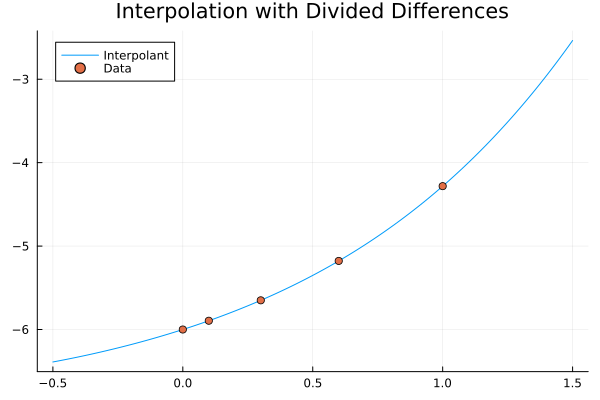

In [2]:
using Plots

data = [(0., -6.), (0.1, -5.89483), (0.3, -5.65014), (0.6, -5.17788), (1., -4.28172)]
P(x) = 0.0633*x^4 + 0.1514*x^3 + 0.5035*x^2 + 0.999766*x - 6.
xs = -0.5:0.01:1.5
plot(xs, P.(xs), label = "Interpolant", title = "Interpolation with Divided Differences", legend = :topleft)
scatter!(data, label = "Data")

### Divided Differences Algorithm Code

In [3]:
function divided_differences(x, f_values)
    n = length(x)
    F = zeros(n, n)  # Create a matrix to hold F[i, j] values
    
    # Set initial values for F[i, 0]
    for i in 1:n
        F[i, 1] = f_values[i]  # F[i, 0] in the image corresponds to F[i, 1] in Julia (1-based indexing)
    end

    # Compute the divided differences
    for i in 2:n  # Start from 2 because 1-based indexing (i corresponds to i+1 in the image)
        for j in 2:i  # Compute only up to i for each row
            F[i, j] = (F[i, j - 1] - F[i - 1, j - 1]) / (x[i] - x[i - (j - 1)])
        end
    end

    # Return the relevant F[i, i] values (diagonal of the matrix)
    return [F[i, i] for i in 1:n]
end

# Example usage
x = [0.0, 0.1, 0.3, 0.6, 1.0]  # Example x values
f_values = [-6.0, -5.89483, -5.65014, -5.17788, -4.28172]  # Corresponding f(x) values

result = divided_differences(x, f_values)
println("Divided differences coefficients: ", result)


Divided differences coefficients: [-6.0, 1.051700000000002, 0.5724999999999832, 0.21500000000004166, 0.06301587301582073]


## Hermite Interpolating Polynomials

# Problem 3.4.1(c)

Use Theorem 3.9 or Algorithm 3.3 to construct an approximating polynomial for the following data.

| $x$ | $f(x)$ | $f'(x)$ |
| --- | --- | --- |
| $-0.5$ | $-0.0247500$ | $0.7510000$ |
| $-0.25$ | $0.3349375$ | $2.1890000$ |
| $0$ | $1.1010000$ | $4.0020000$ |

## Solution:

We construct the entries of the table for Algorithm 3.3:

| $z$ | $f(z)$ | $f[z_{i - 1}, z_{i}]$ | $f[z_{i - 2}, z_{i - 1}, z_{i}]$ | $f[z_{i - 3}, \dots, z_{i}]$ | $f[z_{i - 4}, \dots, z_{i}]$ | $f[z_{i - 5}, \dots, z_{i}]$ |
| --- | --- | --- | --- | --- | --- | --- |
| $\underline{-0.5}$ | $\underline{-0.0247500}$ | |  | |  | |
|  |  | $\underline{0.7510000}$ | |  |  | |
| $\underline{-0.5}$ | $\underline{-0.0247500}$ | | $2.751$ | |  | |
|  |  | $1.43875$ | | $1$ | | | |
| $\underline{-0.25}$ | $\underline{0.3349375}$ | | $3.001$ | | $0$ | |
|  |  | $\underline{2.1890000}$ | | $1$ | | $0$ |
| $\underline{-0.25}$ | $\underline{0.3349375}$ | | $3.501$ | | $0$  | |
|  |  | $3.06425$ | | $1$ |  | |
| $\underline{0}$ | $\underline{1.1010000}$ | | $3.751$ |  |  | |
|  |  | $\underline{4.0020000}$ | | |  | |
| $\underline{0}$ | $\underline{1.1010000}$ | |  |  |  | |

Then, the Hermite interpolating polynomial is $\newline \newline$
$$
H(x) = -0.02475 + 0.751(x + 0.5) + 2.751(x + 0.5)^{2} + 1(x + 0.5)^{2}(x + 0.25) + 0(x + 0.5)^{2}(x + 0.25)^{2} + 0(x + 0.5)^{2}(x + 0.25)^{2}(x - 0),
\newline
$$
which reduces to $\newline \newline$
$$
\begin{align*}
    H(x) &= -0.02475 + 0.751(x + 0.5) + 2.751(x + 0.5)^{2} + 1(x + 0.5)^{2}(x + 0.25) \\
    &= x^{3} + 4.001x^{2} + 4.002x + 1.101.
\end{align*}
\newline
$$

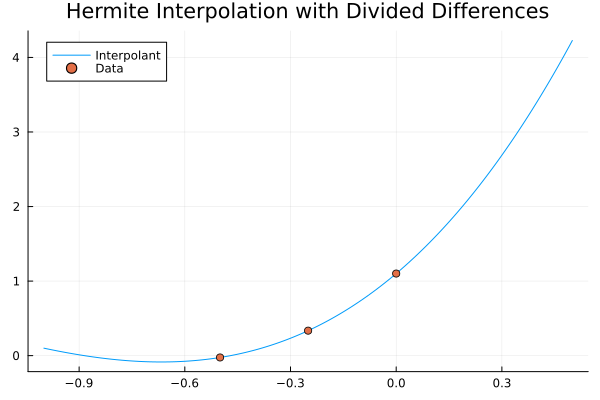

In [4]:
data = [(-0.5, -0.02475), (-0.25, 0.3349375), (0., 1.101)]
H(x) = x^3 + 4.001*x^2 + 4.002*x + 1.101
xs = -1.:0.01:0.5
plot(xs, H.(xs), label = "Interpolant", title = "Hermite Interpolation with Divided Differences", legend = :topleft)
scatter!(data, label = "Data")